<a href="https://colab.research.google.com/github/Fallennnnnn/A-Z-Uppercase-Handwriting-Recognition/blob/main/Heart_Attack_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Risk Prediction**

# Data Load and Understanding

## Importing Library and Load Dataset

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score,  f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [25]:
# Load the dataset
url = "https://raw.githubusercontent.com/Fallennnnnn/Heart-Attack-Prediction/main/Dataset/heart_attack_prediction_dataset.csv"
heartrisk = pd.read_csv(url)

In [26]:
# Check dataset
heartrisk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## Exploratory Data Analysis

In [27]:
heartrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [28]:
heartrisk.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### Visualize Column

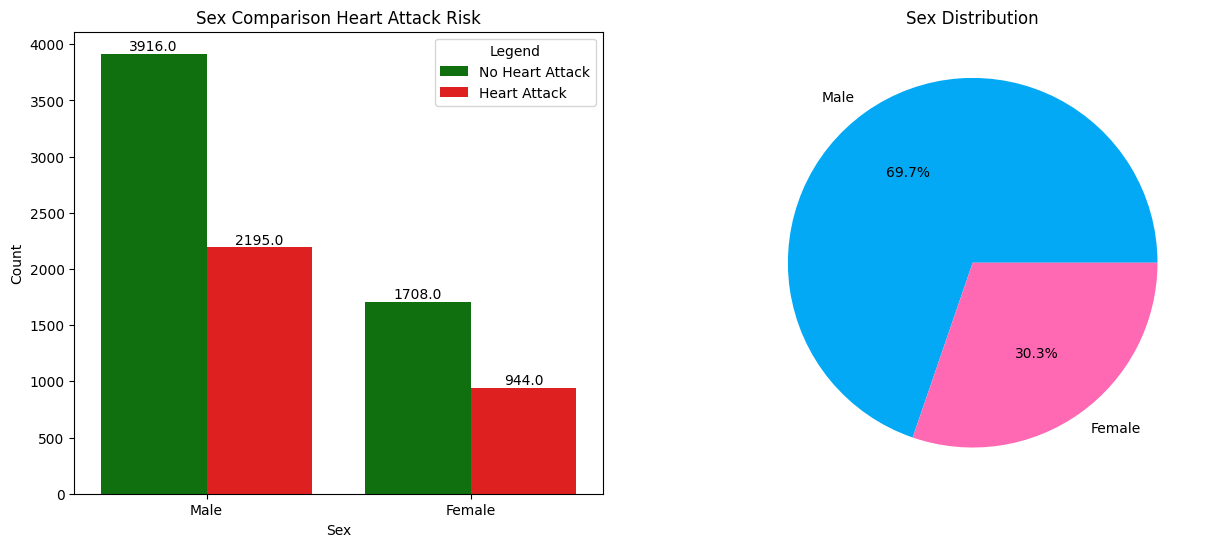

<Figure size 800x600 with 0 Axes>

In [29]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Sex vs. Heart Attack Risk for both groups
custom_palette = ['green', 'red']
pie_palette = ['#03a9f4', '#FF69B4']
sns.countplot(x='Sex', hue='Heart Attack Risk', data=heartrisk, palette = custom_palette, ax= ax1)
ax1.set_title('Sex Comparison Heart Attack Risk')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')

# Rename the legend labels
legend_labels = ['No Heart Attack', 'Heart Attack']
ax1.legend(legend_labels, title='Legend')

# Add counts on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Create a pie chart for sex distribution
plt.figure(figsize=(8, 6))
sex_counts = heartrisk['Sex'].value_counts()
ax2.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=pie_palette)
ax2.set_title('Sex Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

As we can see that in the visualizations male have higher count for this heart attack risk

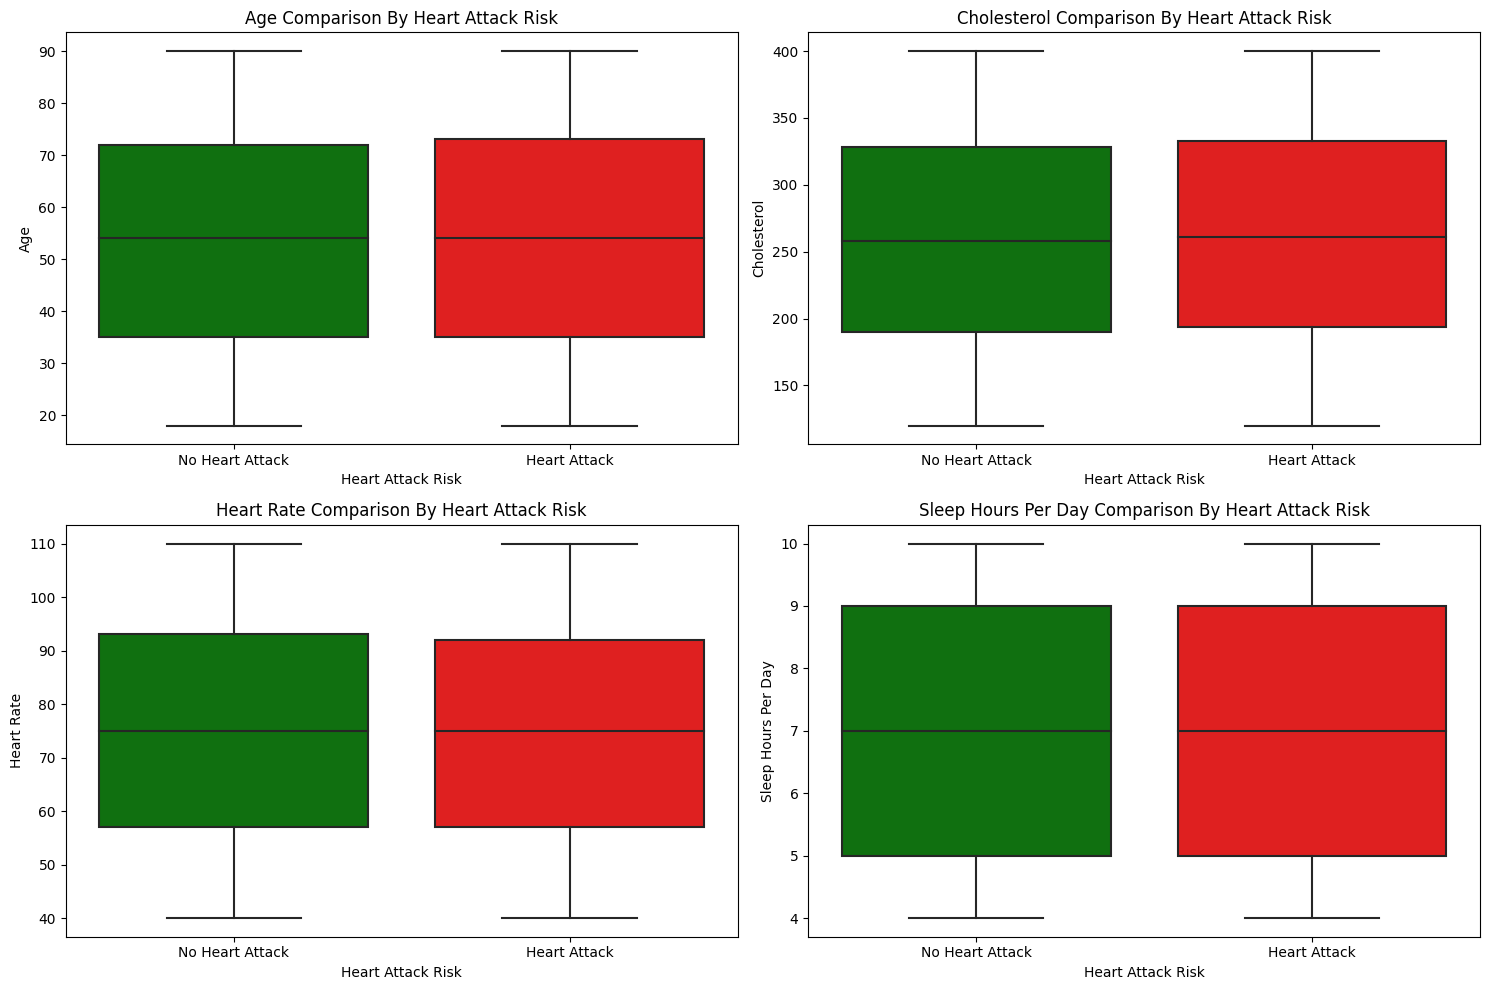

In [30]:
# Create subplots with 2 rows and 2 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
custom_palette = ['green', 'red']
default = [0, 1]
destination = ['No Heart Attack', 'Heart Attack']

# Plot Age vs. Heart Attack Risk for both groups
sns.boxplot(x='Heart Attack Risk', y='Age', data=heartrisk, palette=custom_palette, ax = ax1)
ax1.set_title('Age Comparison By Heart Attack Risk')
ax1.set_xlabel('Heart Attack Risk')
ax1.set_ylabel('Age')

# Customize x-axis labels
ax1.set_xticks(default, destination)

# Plot Age vs. Heart Attack Risk for both groups
sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=heartrisk, palette=custom_palette, ax = ax2)
ax2.set_title('Cholesterol Comparison By Heart Attack Risk')
ax2.set_xlabel('Heart Attack Risk')
ax2.set_ylabel('Cholesterol')

# Customize x-axis labels
ax2.set_xticks(default, destination)

# Plot Age vs. Heart Attack Risk for both groups
sns.boxplot(x='Heart Attack Risk', y='Heart Rate', data=heartrisk, palette=custom_palette, ax = ax3)
ax3.set_title('Heart Rate Comparison By Heart Attack Risk')
ax3.set_xlabel('Heart Attack Risk')
ax3.set_ylabel('Heart Rate')

# Customize x-axis labels
ax3.set_xticks(default, destination)

# Plot Sleep Hours Per Day Comparison By Heart Attack Risk for both groups
sns.boxplot(x='Heart Attack Risk', y='Sleep Hours Per Day', data=heartrisk, palette=custom_palette, ax = ax4)
ax4.set_title('Sleep Hours Per Day Comparison By Heart Attack Risk')
ax4.set_xlabel('Heart Attack Risk')
ax4.set_ylabel('Sleep Hours Per Day')

# Customize x-axis labels
ax4.set_xticks(default, destination)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

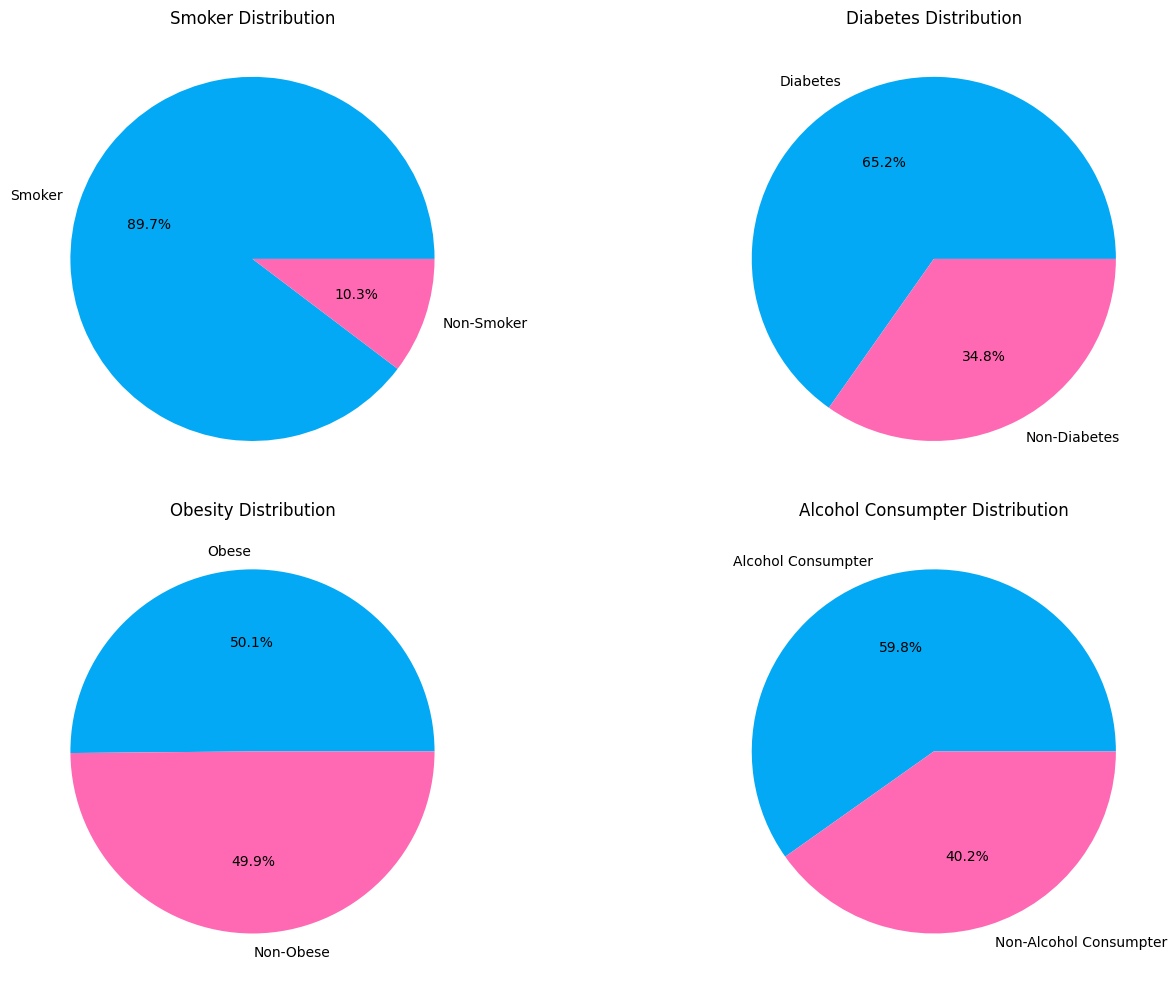

In [31]:
# Create subplots with 2 rows and 2 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Create a pie chart for smoking distribution
ax1.labels = ['Smoker', 'Non-Smoker']
smoker_counts = heartrisk['Smoking'].value_counts()
ax1.pie(smoker_counts, labels=ax1.labels, autopct='%1.1f%%', colors=pie_palette)
ax1.set_title('Smoker Distribution')

# Create a pie chart for Diabetes distribution
ax2.labels = ['Diabetes', 'Non-Diabetes']
diabetes_counts = heartrisk['Diabetes'].value_counts()
ax2.pie(diabetes_counts, labels=ax2.labels, autopct='%1.1f%%', colors=pie_palette)
ax2.set_title('Diabetes Distribution')

# Create a pie chart for Obesity distribution
ax3.labels = ['Obese', 'Non-Obese']
obesity_counts = heartrisk['Obesity'].value_counts()
ax3.pie(obesity_counts, labels=ax3.labels, autopct='%1.1f%%', colors=pie_palette)
ax3.set_title('Obesity Distribution')

# Create a pie chart for Alcohol Consumpter distribution
ax4.labels = ['Alcohol Consumpter', 'Non-Alcohol Consumpter']
alcohol_counts = heartrisk['Alcohol Consumption'].value_counts()
ax4.pie(alcohol_counts, labels=ax4.labels, autopct='%1.1f%%', colors=pie_palette)
ax4.set_title('Alcohol Consumpter Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

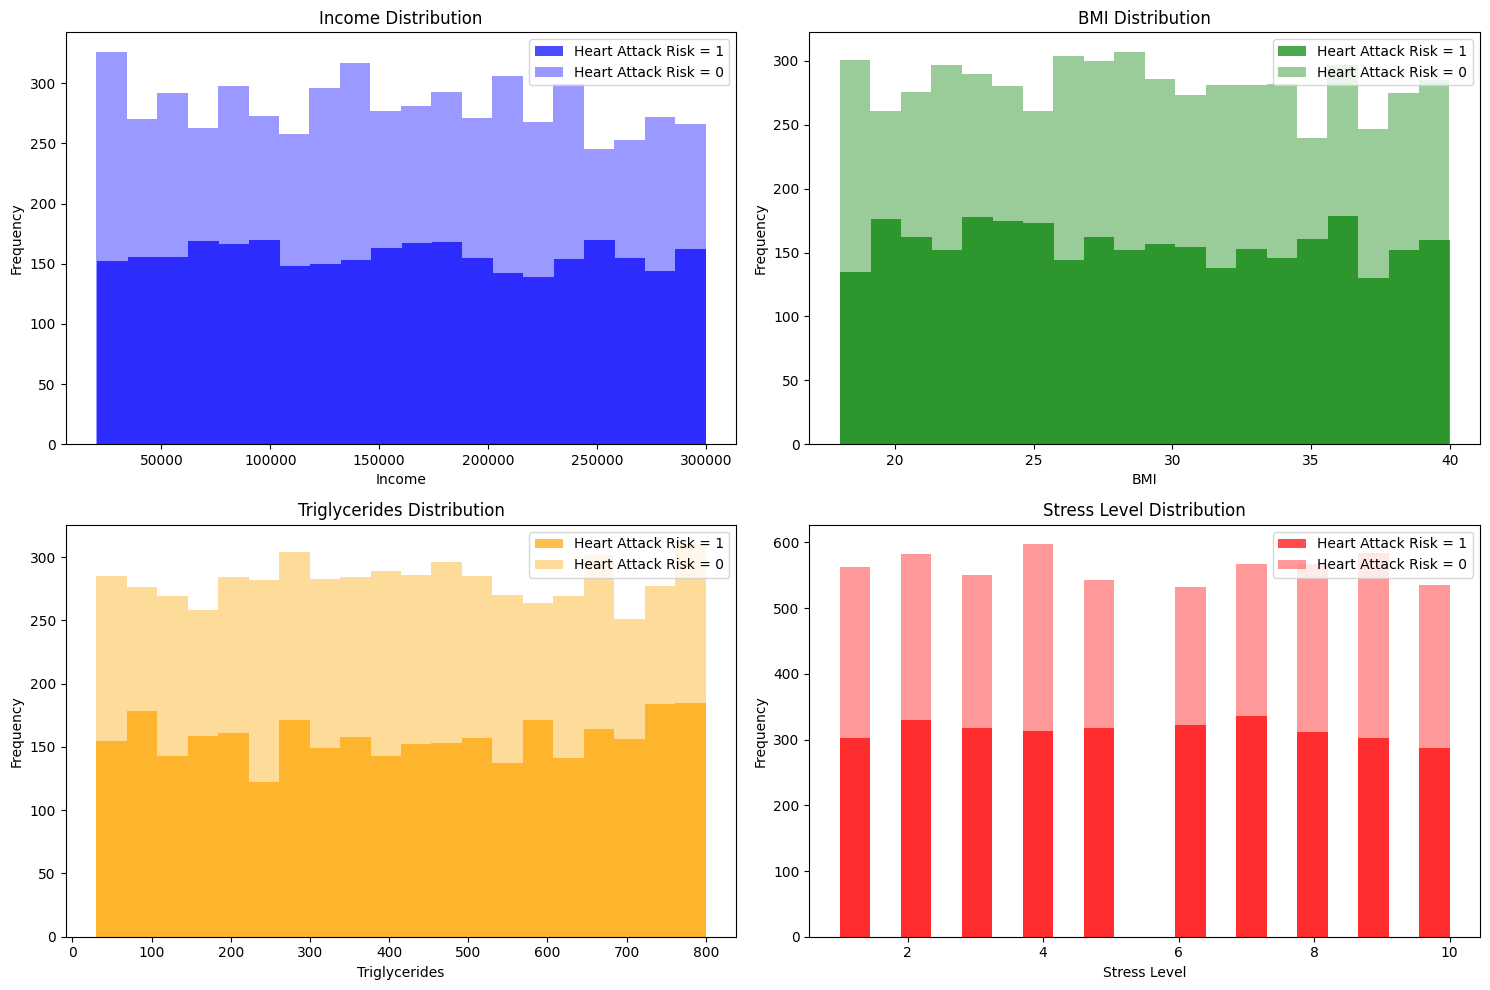

In [32]:
# Separate data for patients with Heart Attack Risk = 1 and Heart Attack Risk = 0
heart_attack_patients = heartrisk[heartrisk['Heart Attack Risk'] == 1]
no_heart_attack_patients = heartrisk[heartrisk['Heart Attack Risk'] == 0]

# Create subplots for each variable
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms for each variable for Heart Attack Risk = 1
ax1.hist(heart_attack_patients['Income'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Income Distribution')
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')

ax2.hist(heart_attack_patients['BMI'], bins=20, color='green', alpha=0.7)
ax2.set_title('BMI Distribution')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Frequency')

ax3.hist(heart_attack_patients['Triglycerides'], bins=20, color='orange', alpha=0.7)
ax3.set_title('Triglycerides Distribution')
ax3.set_xlabel('Triglycerides')
ax3.set_ylabel('Frequency')

ax4.hist(heart_attack_patients['Stress Level'], bins=20, color='red', alpha=0.7)
ax4.set_title('Stress Level Distribution')
ax4.set_xlabel('Stress Level')
ax4.set_ylabel('Frequency')

# Add a legend for the two groups
ax1.legend(['Heart Attack Risk = 1'])
ax2.legend(['Heart Attack Risk = 1'])
ax3.legend(['Heart Attack Risk = 1'])
ax4.legend(['Heart Attack Risk = 1'])

# Plot histograms for each variable for Heart Attack Risk = 0
ax1.hist(no_heart_attack_patients['Income'], bins=20, color='blue', alpha=0.4)
ax2.hist(no_heart_attack_patients['BMI'], bins=20, color='green', alpha=0.4)
ax3.hist(no_heart_attack_patients['Triglycerides'], bins=20, color='orange', alpha=0.4)
ax4.hist(no_heart_attack_patients['Stress Level'], bins=20, color='red', alpha=0.4)

# Add a legend for the two groups
ax1.legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])
ax2.legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])
ax3.legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])
ax4.legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

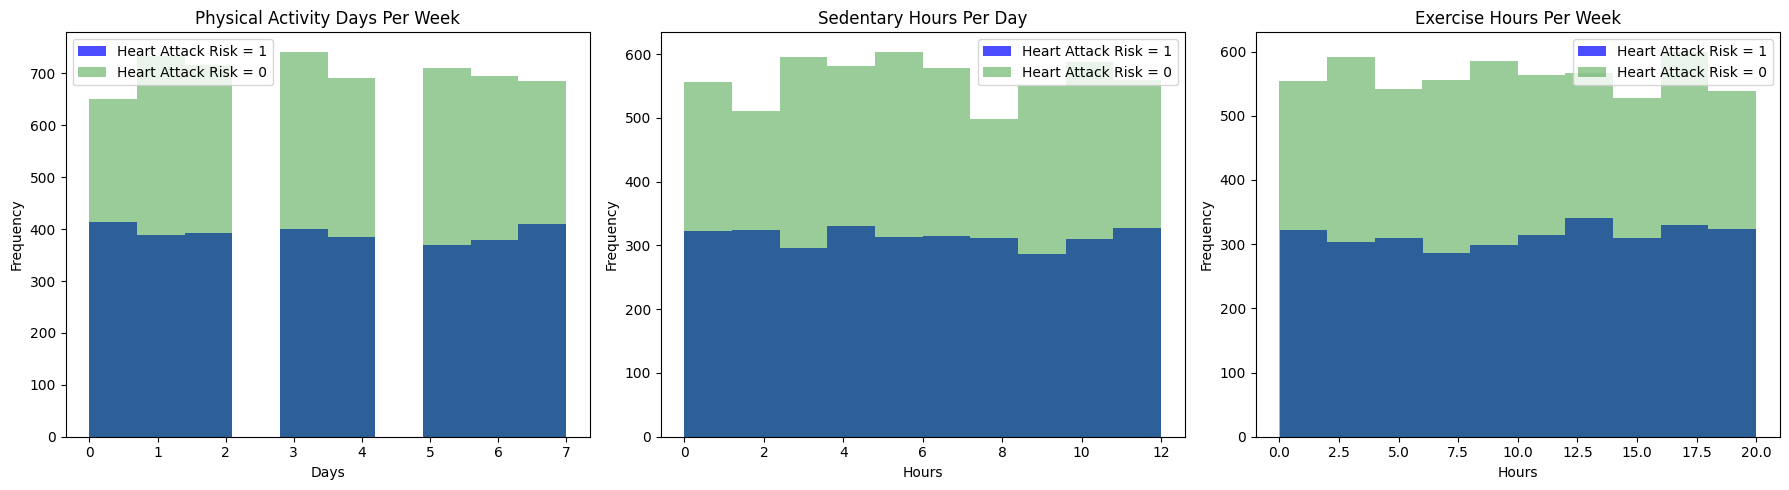

In [33]:
# Create subplots for each variable
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histograms for Physical Activity Days Per Week
axs[0].hist(heart_attack_patients['Physical Activity Days Per Week'], bins=10, color='blue', alpha=0.7)
axs[0].hist(no_heart_attack_patients['Physical Activity Days Per Week'], bins=10, color='green', alpha=0.4)
axs[0].set_title('Physical Activity Days Per Week')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Frequency')
axs[0].legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])

# Plot histograms for Sedentary Hours Per Day
axs[1].hist(heart_attack_patients['Sedentary Hours Per Day'], bins=10, color='blue', alpha=0.7)
axs[1].hist(no_heart_attack_patients['Sedentary Hours Per Day'], bins=10, color='green', alpha=0.4)
axs[1].set_title('Sedentary Hours Per Day')
axs[1].set_xlabel('Hours')
axs[1].set_ylabel('Frequency')
axs[1].legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])

# Plot histograms for Exercise Hours Per Week
axs[2].hist(heart_attack_patients['Exercise Hours Per Week'], bins=10, color='blue', alpha=0.7)
axs[2].hist(no_heart_attack_patients['Exercise Hours Per Week'], bins=10, color='green', alpha=0.4)
axs[2].set_title('Exercise Hours Per Week')
axs[2].set_xlabel('Hours')
axs[2].set_ylabel('Frequency')
axs[2].legend(['Heart Attack Risk = 1', 'Heart Attack Risk = 0'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Data Preparation

In [34]:
# Check Null Values
heartrisk.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [35]:
# Check Duplicate
heartrisk.duplicated().any()

False

<ipython-input-36-a9427a5318a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heartrisk.corr()


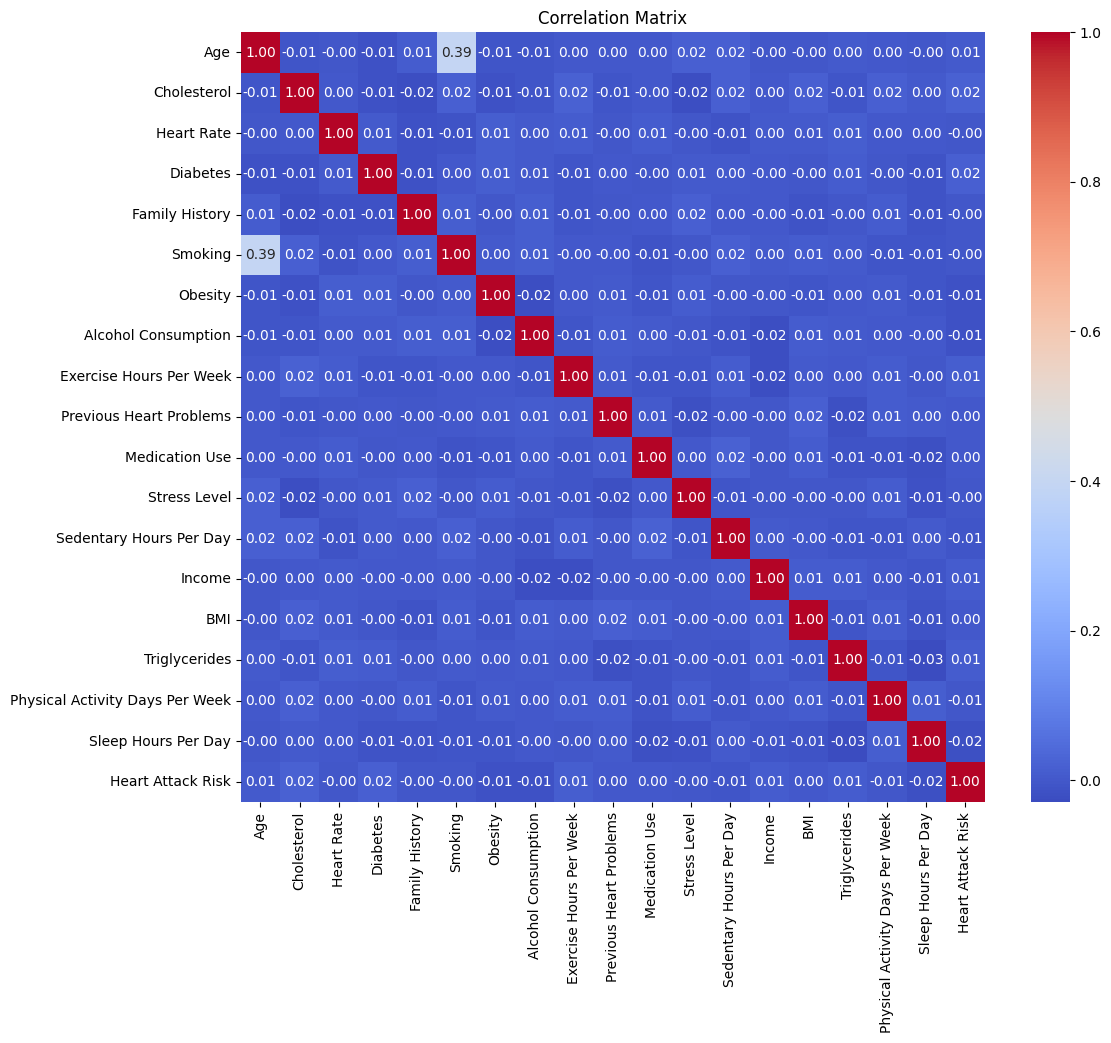

In [36]:
# Check column correlation
correlation_matrix = heartrisk.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [37]:
# Drop Unecessary column
heartrisk = heartrisk.drop(['Patient ID','Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere'], axis=1)

In [38]:
# Age grouping
groups = [0, 18, 31, 60, 100]  # Define age group
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']  # Labels for age group
heartrisk['Age Group'] = pd.cut(heartrisk['Age'], bins=groups, labels=labels)

In [39]:
# BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

heartrisk['BMI Category'] = heartrisk['BMI'].apply(bmi_category)

In [40]:
# One-hot encoding for 'Sex'
heartrisk = pd.get_dummies(heartrisk, columns=['Sex'], prefix='Sex')

In [41]:
# Use label encoding when the categorical feature has an ordinal relationship
label_encoder = LabelEncoder()
heartrisk['Age Group'] = label_encoder.fit_transform(heartrisk['Age Group'])
heartrisk['BMI Category'] = label_encoder.fit_transform(heartrisk['BMI Category'])

In [42]:
heartrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

In [43]:
# Split the data into train and test sets (80% train, 20% test)
X = heartrisk.drop('Heart Attack Risk', axis=1)
y = heartrisk['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling and Evaluation

In [45]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)

    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(
        y_test, y_pred, target_names=['No Heart Attack', 'Heart Attack'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(y_test, y_pred)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
                 precision    recall  f1-score   support

No Heart Attack       0.64      0.97      0.77      1125
   Heart Attack       0.38      0.03      0.06       628

       accuracy                           0.63      1753
      macro avg       0.51      0.50      0.42      1753
   weighted avg       0.55      0.63      0.52      1753

Random Forest Accuracy: 0.6349
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
                 precision    recall  f1-score   support

No Heart Attack       0.64      1.00      0.78      1125
   Heart Attack       1.00      0.00      0.00       628

       accuracy                           0.64      1753
      macro avg       0.82      0.50      0.39      1753
   weighted avg       0.77      0.64      0.50      1753

Logistic Regression Accuracy: 0.6418
Training Decision Tree...
Evaluating Decision Tree...

Classification Repo

In [46]:
# Create a dictionary to store the accuracies of all models
model_accuracies = {}

# Calculate and store the accuracy of each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Find the best-performing model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"The best-performing model is {best_model} with an accuracy of {best_accuracy:.4f}")

The best-performing model is Logistic Regression with an accuracy of 0.6418
